# Linear regression example

Simple example from https://docs.pymc.io/en/v4.2.0/learn/core_notebooks/pymc_overview.html#pymc-overview

More great notebooks at: https://docs.pymc.io/en/v4.2.0/learn/core_notebooks/index.html

In [1]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import pymc as pm

print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v4.2.0


In [2]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [40]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 10

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + rng.normal(size=size) * sigma

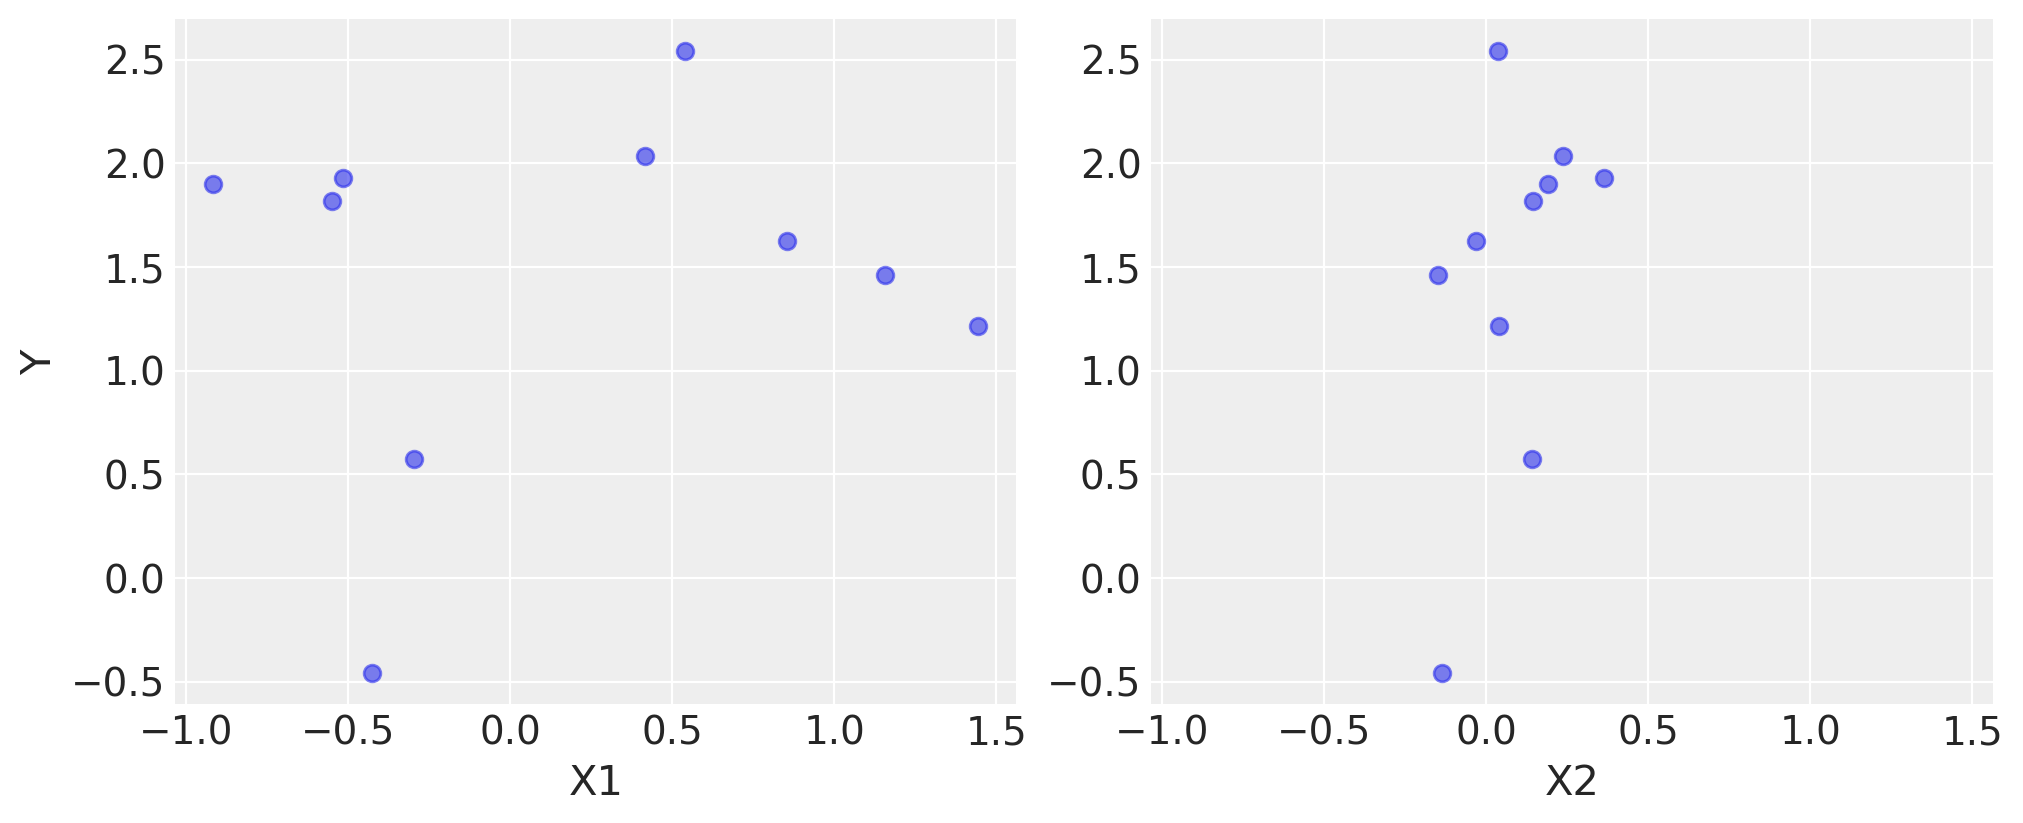

In [41]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2");

In [43]:
basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

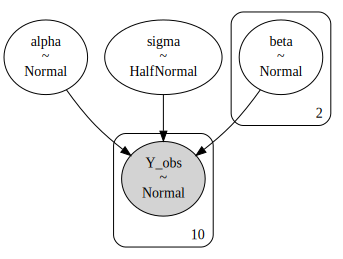

In [44]:
pm.model_to_graphviz(basic_model)

In [45]:
with basic_model:
    # draw 1000 posterior samples
    idata = pm.sample()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.


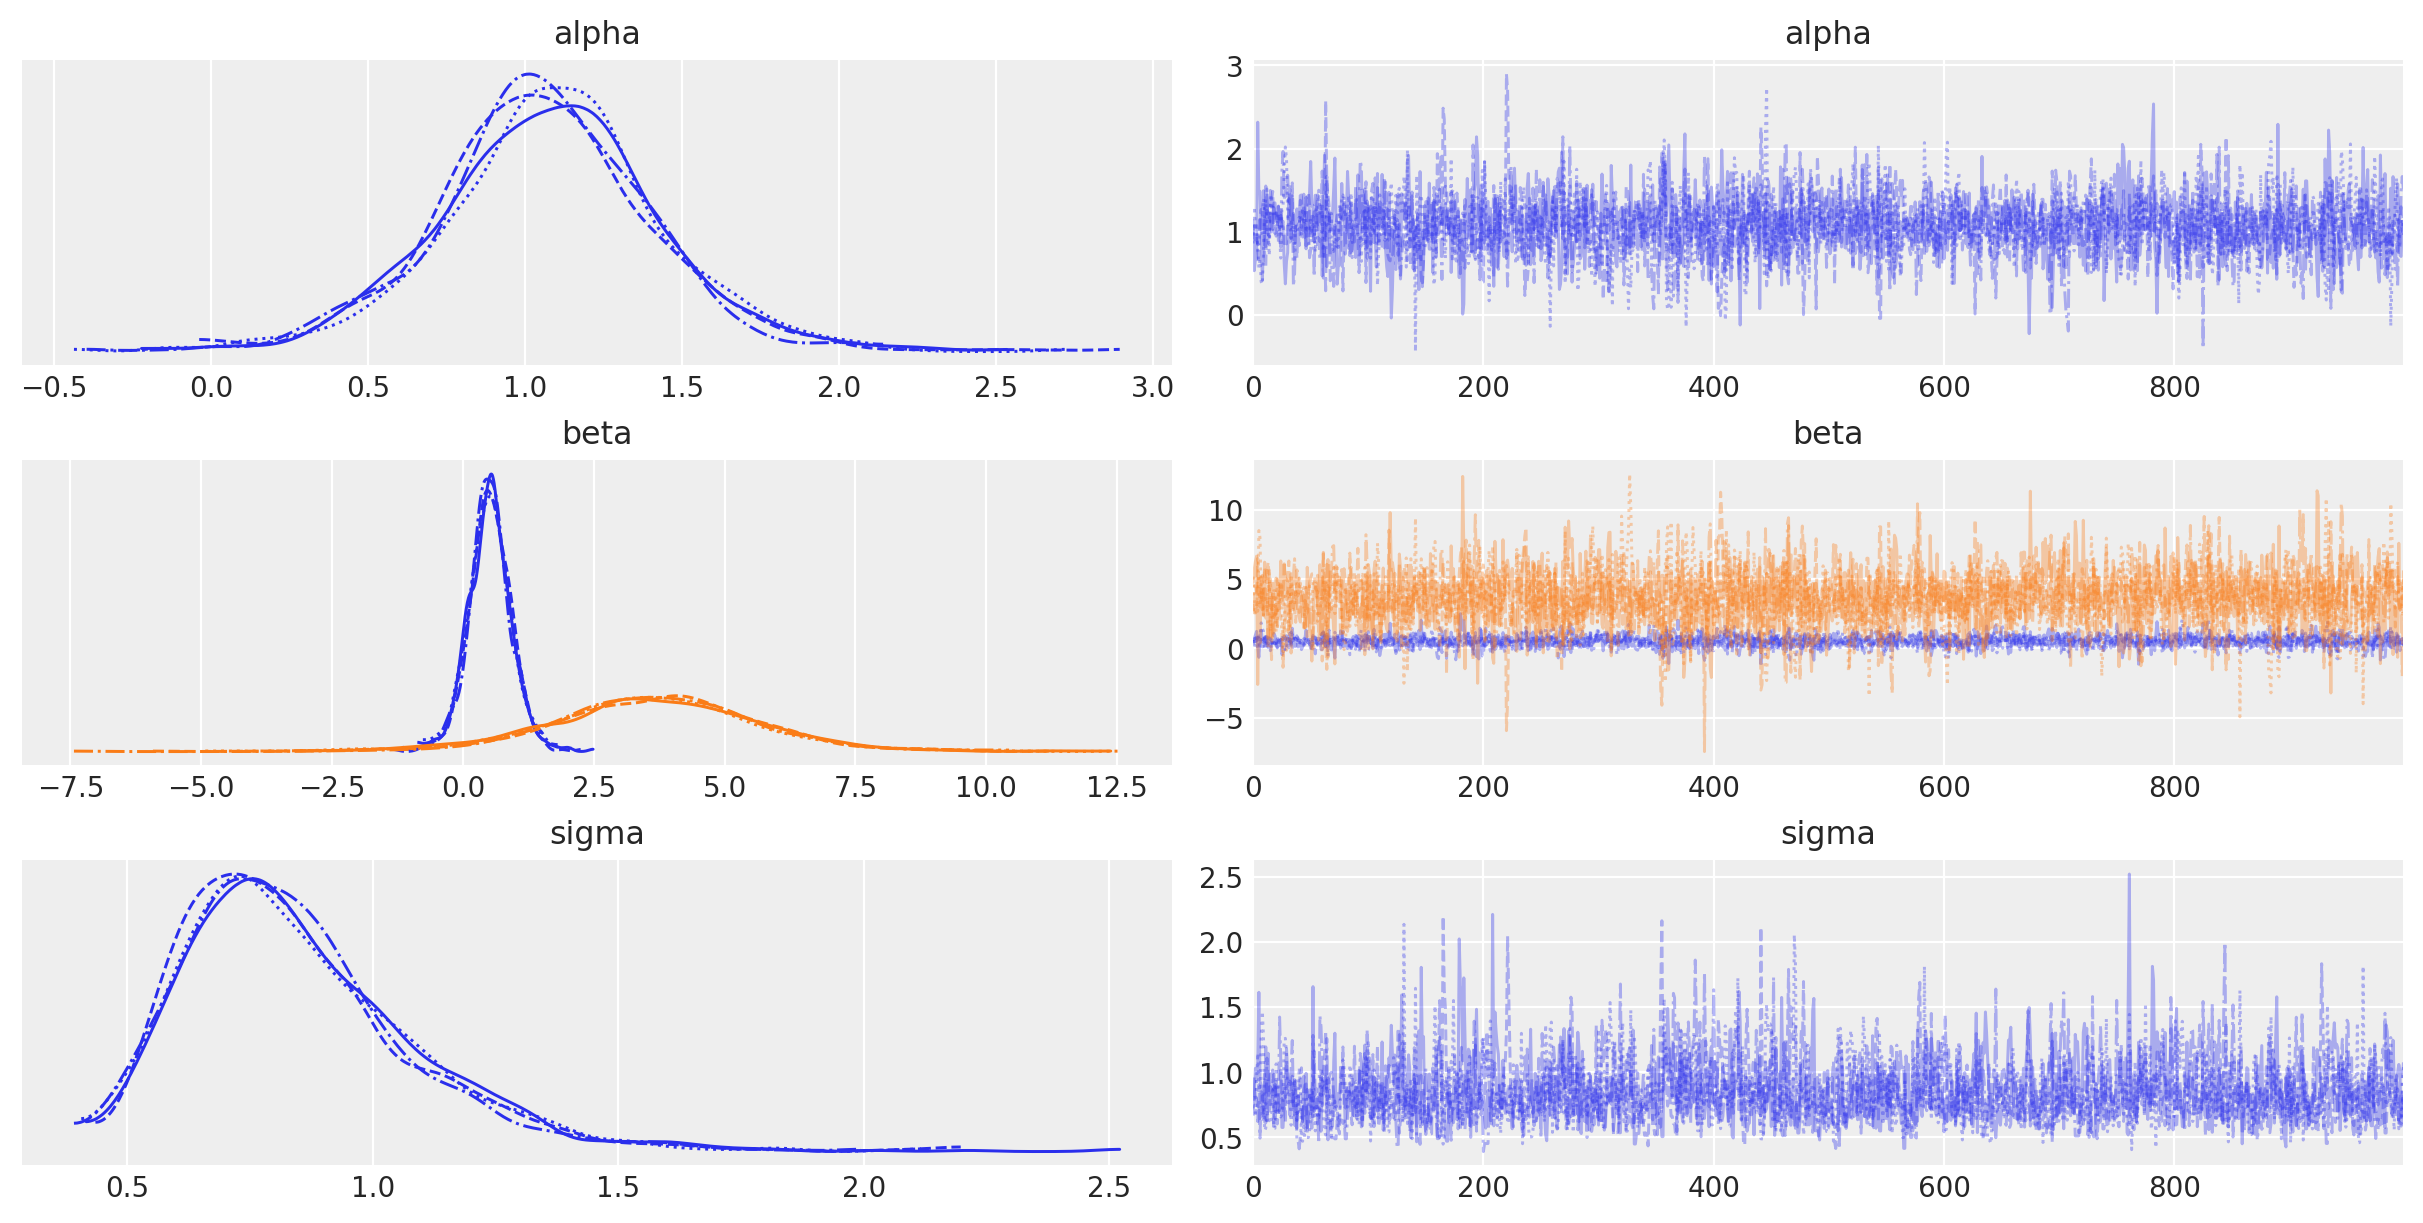

In [46]:
az.plot_trace(idata); #, combined=True);

In [47]:
az.summary(idata, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,1.07,0.35,0.40,1.73,0.01,0.01,2240.92,2540.35,1.0
beta[0],0.51,0.41,-0.23,1.32,0.01,0.01,2325.87,2364.79,1.0
beta[1],3.65,2.00,-0.06,7.48,0.05,0.03,1867.94,2034.11,1.0
sigma,0.84,0.24,0.47,1.27,0.01,0.00,1589.67,1705.31,1.0


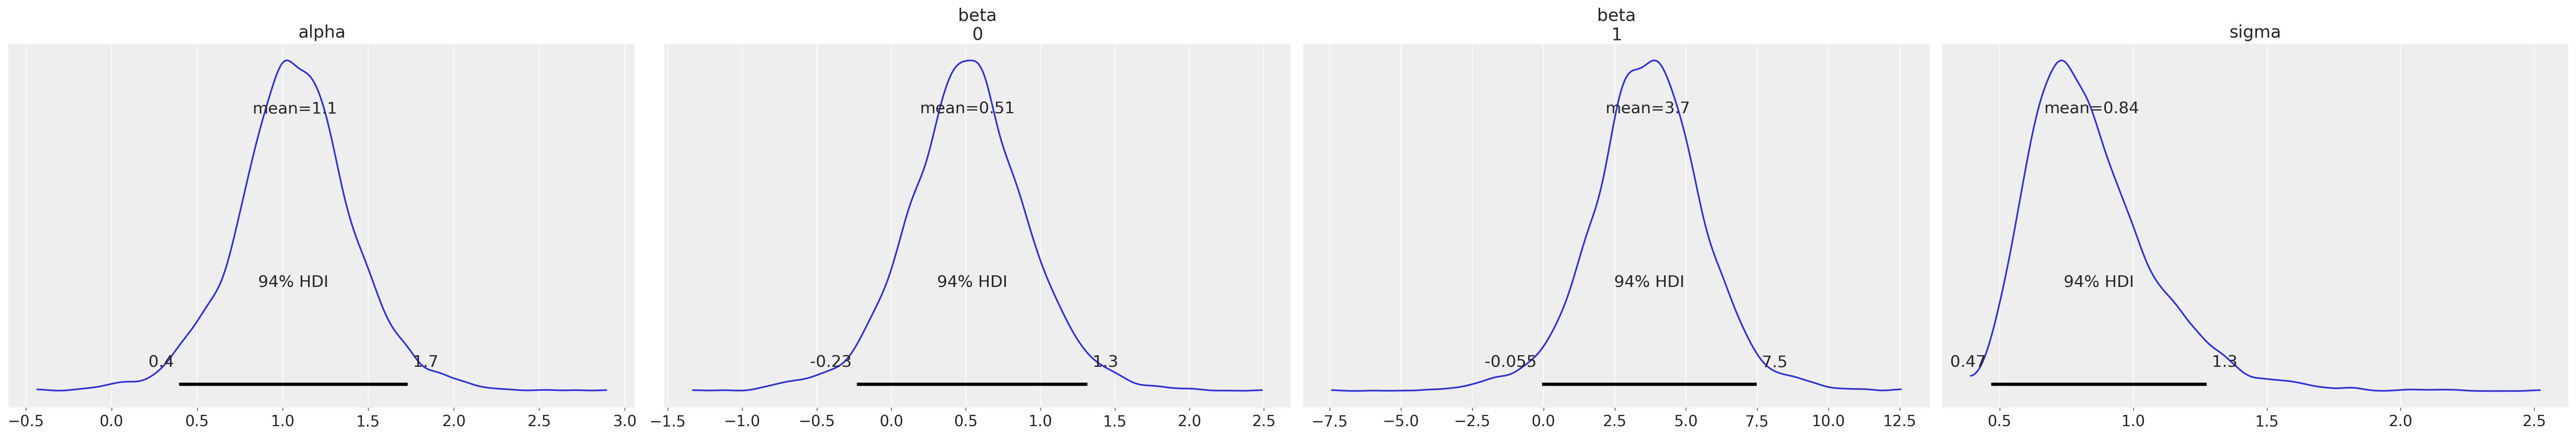

In [48]:
az.plot_posterior(idata);

In [35]:
idata

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [50]:
with basic_model:
    prior_samples = pm.sample_prior_predictive(100)

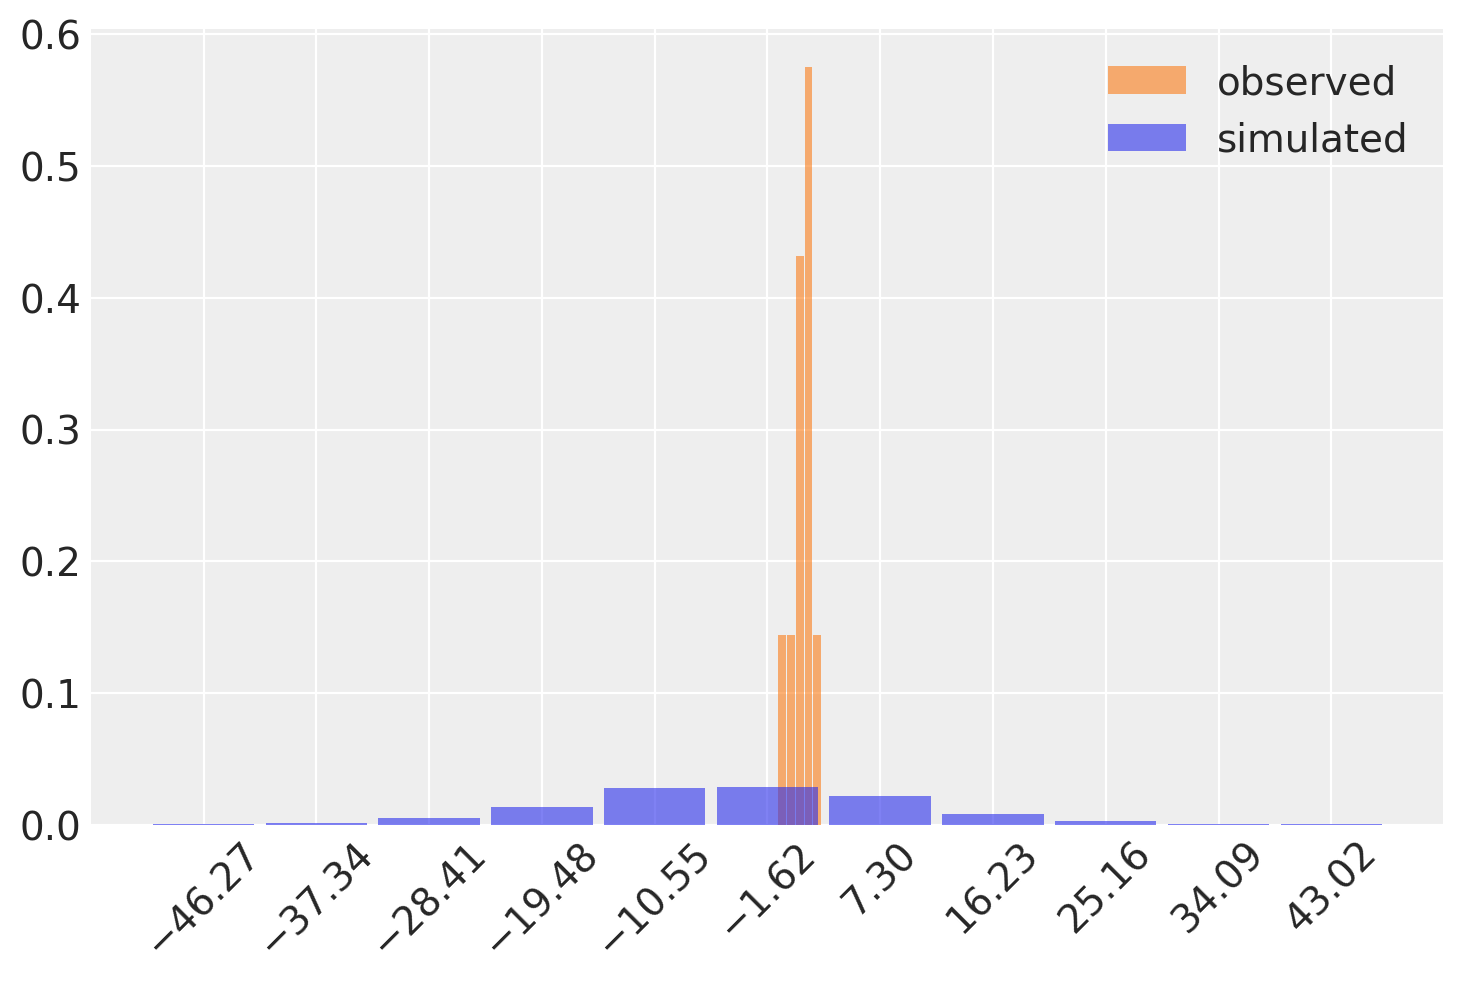

In [57]:
az.plot_dist(
    Y,
    kind="hist",
    color="C1",
    hist_kwargs=dict(alpha=0.6),
    label="observed",
)
az.plot_dist(
    prior_samples.prior_predictive["Y_obs"],
    kind="hist",
    hist_kwargs=dict(alpha=0.6),
    label="simulated",
)
plt.xticks(rotation=45);

In [60]:
with basic_model:
    posterior_samples = pm.sample_posterior_predictive(idata, extend_inferencedata=True)

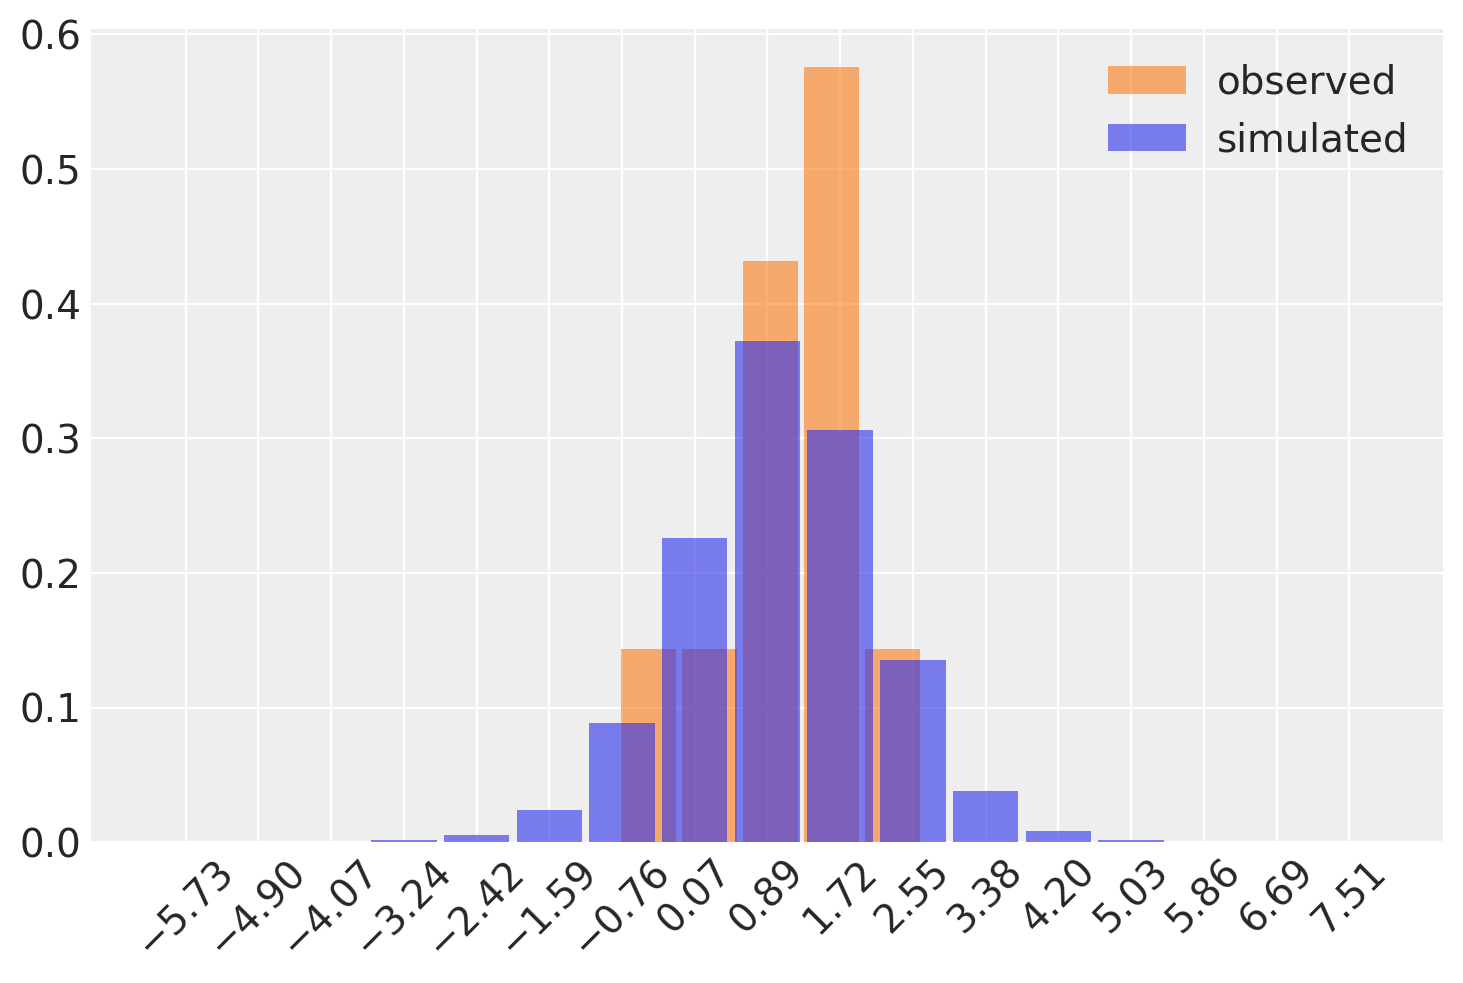

In [61]:
az.plot_dist(
    Y,
    kind="hist",
    color="C1",
    hist_kwargs=dict(alpha=0.6),
    label="observed",
)
az.plot_dist(
    posterior_samples.posterior_predictive["Y_obs"],
    kind="hist",
    hist_kwargs=dict(alpha=0.6),
    label="simulated",
)
plt.xticks(rotation=45);